 # Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset
- Data Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [446]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('darkgrid')
%matplotlib inline

In [447]:
df_raw = pd.read_csv("bank_data.csv")

# make a copy for editing
df = df_raw.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [448]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [449]:
df.head(5)                    

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Part 1.2: Data cleaning

In [450]:
# check duplicates

df.duplicated().sum()

12

In [451]:
# delete duplicates

df.drop_duplicates(subset=None,keep='first',inplace=True)
assert df.duplicated().sum() == 0
df.shape

(41176, 21)

In [452]:
# check missing values

df.isna().sum().sum()

0

In [453]:
# rescaling (depends on algorithms)

### Part 1.3: Understand features

**Input variables:**
 - bank client data:
  - age (numeric)
  - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
  - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
  - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
  - default: has credit in default? (categorical: 'no','yes','unknown')
  - housing: has housing loan? (categorical: 'no','yes','unknown')
  - loan: has personal loan? (categorical: 'no','yes','unknown')
 - related with the last contact of the current campaign:
  - contact: contact communication type (categorical: 'cellular','telephone')
  - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
  - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
  - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
 - other attributes:
  - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  - previous: number of contacts performed before this campaign and for this client (numeric)
  - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
 - social and economic context attributes
  - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  - cons.price.idx: consumer price index - monthly indicator (numeric)
  - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
  - euribor3m: euribor 3 month rate - daily indicator (numeric)
  - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
  - y - has the client subscribed a term deposit? (binary: 'yes','no')

***Numerical Variables:***

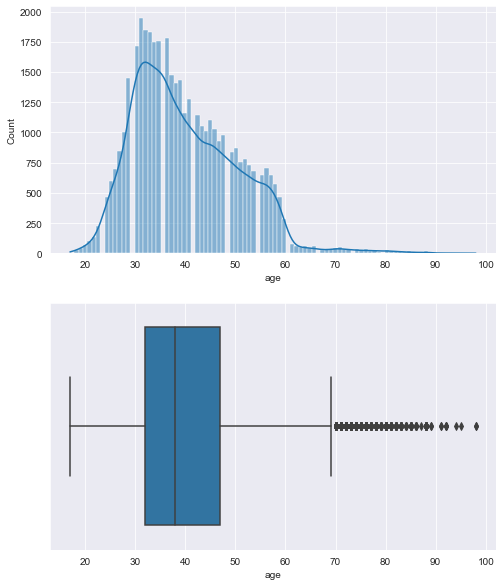

In [454]:
# age 

fig,ax = plt.subplots(2,1,figsize = (8,10))
sns.histplot(x = df.age,kde = True,ax = ax[0]);
sns.boxplot(x = df.age,ax = ax[1]);

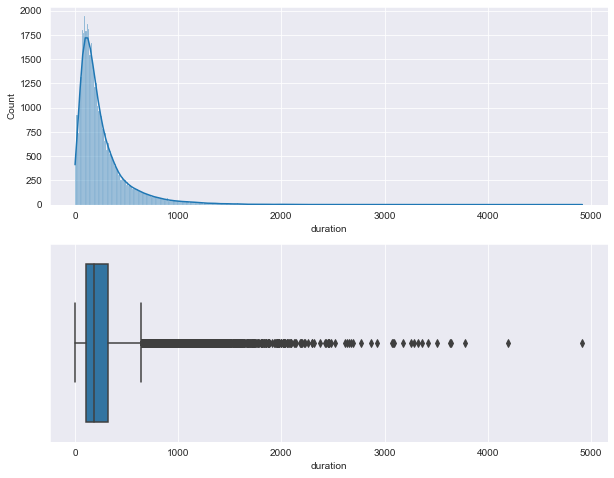

In [455]:
# duration

fig,ax = plt.subplots(2,1,figsize = (10,8))
sns.histplot(x = df.duration,kde = True,ax = ax[0]);
sns.boxplot(x = df.duration,ax = ax[1]);

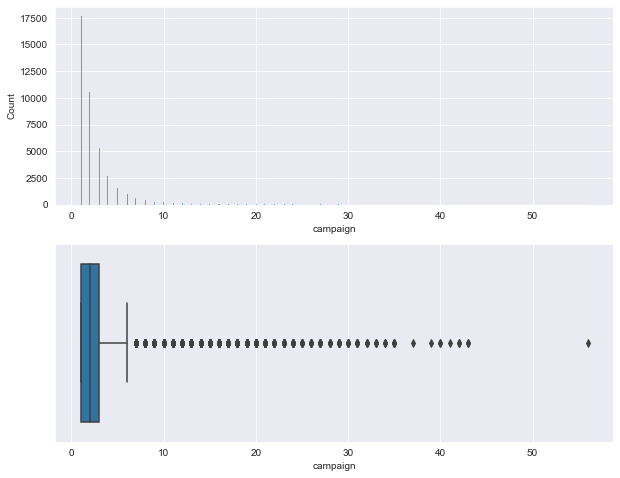

In [456]:
# campaign

fig,ax = plt.subplots(2,1,figsize = (10,8))
sns.histplot(x = df.campaign,ax = ax[0]);
sns.boxplot(x = df.campaign,ax = ax[1]);

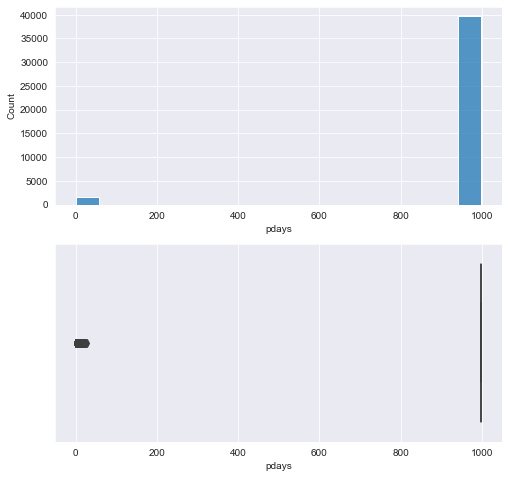

In [457]:
# pdays

fig,ax = plt.subplots(2,1,figsize = (8,8))
sns.histplot(x = df.pdays,ax = ax[0]);
sns.boxplot(x = df.pdays,ax = ax[1]);

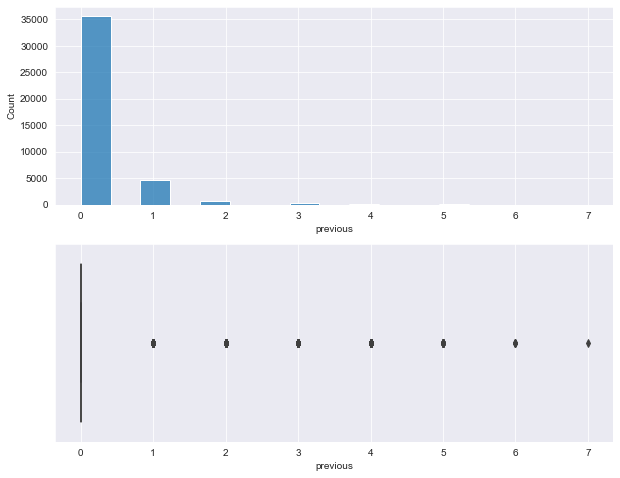

In [458]:
# previous

fig,ax = plt.subplots(2,1,figsize = (10,8))
sns.histplot(x = df.previous,ax = ax[0]);
sns.boxplot(x = df.previous,ax = ax[1]);


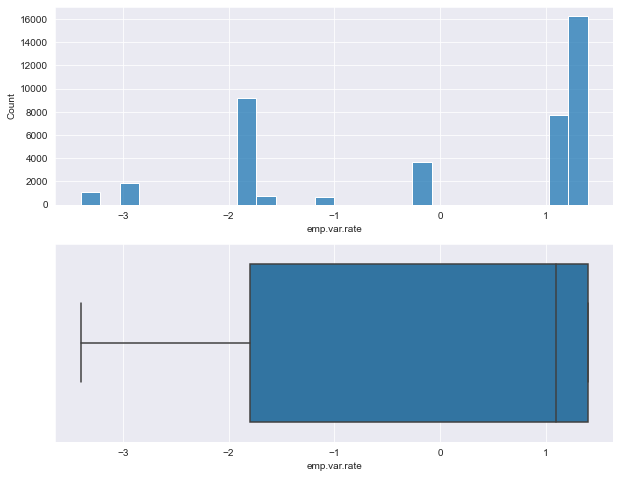

In [459]:
# emp.var.rate

fig,ax = plt.subplots(2,1,figsize = (10,8))
sns.histplot(x = df['emp.var.rate'],ax = ax[0]);
sns.boxplot(x = df['emp.var.rate'],ax = ax[1]);



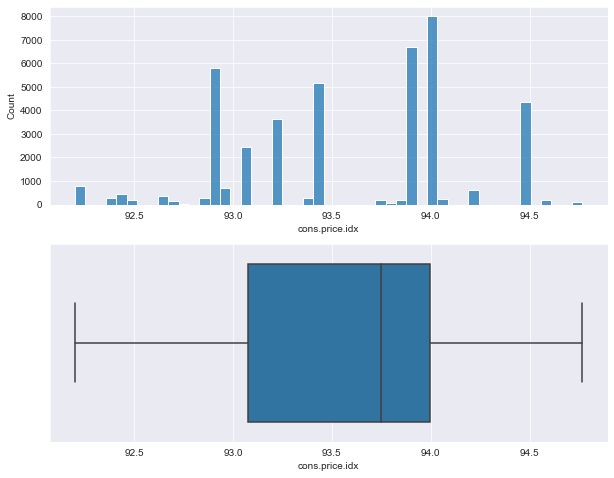

In [460]:
# cons.price.idx

fig,ax = plt.subplots(2,1,figsize = (10,8))
sns.histplot(x = df['cons.price.idx'],ax = ax[0]);
sns.boxplot(x = df['cons.price.idx'],ax = ax[1]);




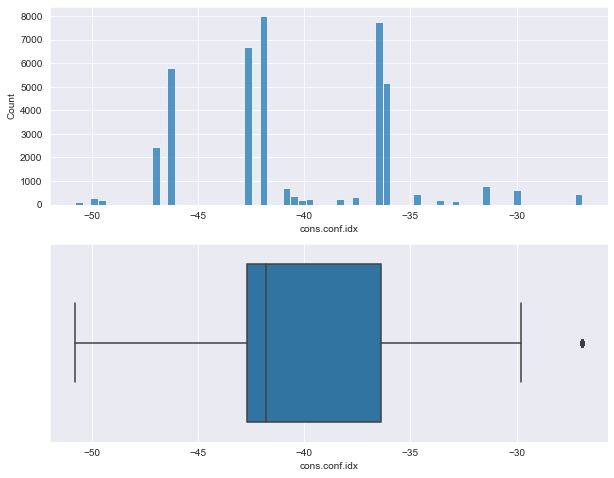

In [461]:
# cons.conf.idx

fig,ax = plt.subplots(2,1,figsize = (10,8))
sns.histplot(x = df['cons.conf.idx'],ax = ax[0]);
sns.boxplot(x = df['cons.conf.idx'],ax = ax[1]);


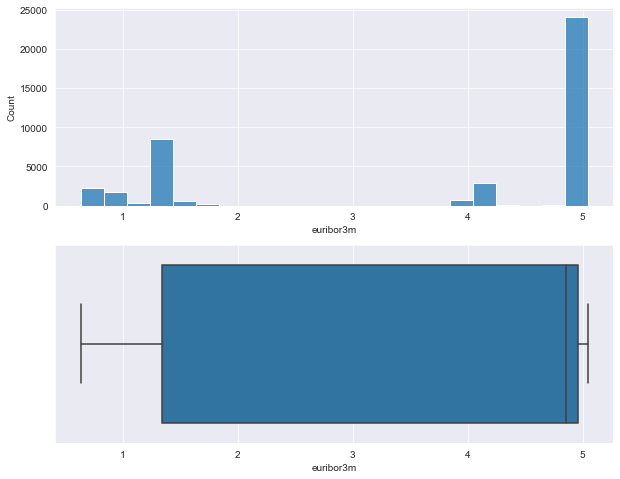

In [462]:
# euribor3m

fig,ax = plt.subplots(2,1,figsize = (10,8))
sns.histplot(x = df['euribor3m'],ax = ax[0]);
sns.boxplot(x = df['euribor3m'],ax = ax[1]);


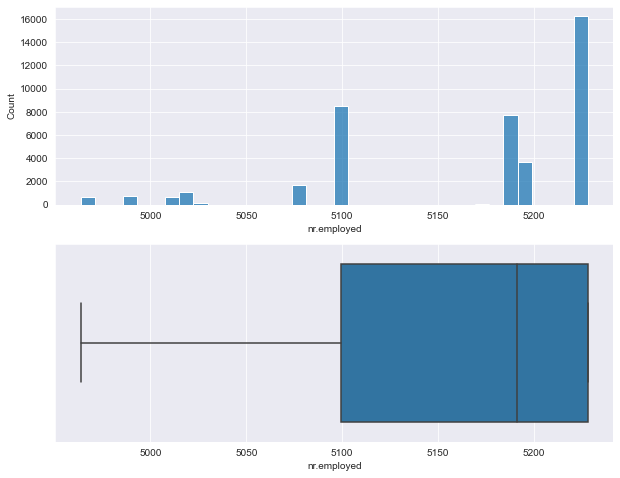

In [463]:
# nr.employed

fig,ax = plt.subplots(2,1,figsize = (10,8))
sns.histplot(x = df['nr.employed'],ax = ax[0]);
sns.boxplot(x = df['nr.employed'],ax = ax[1]);

***Categorical Variables:***

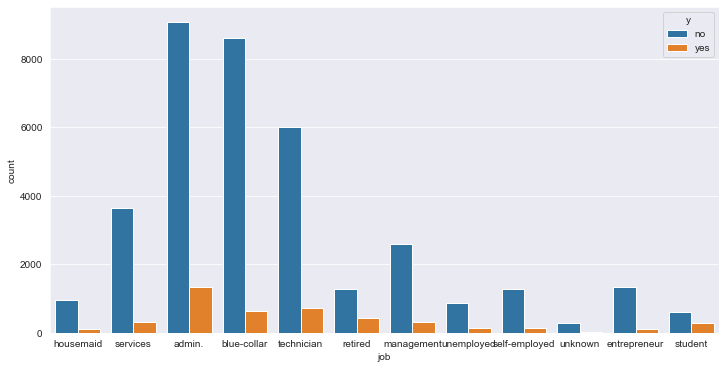

In [464]:
# job
plt.subplots(1,1,figsize = (12,6))
sns.countplot(x = df.job, hue = df.y);


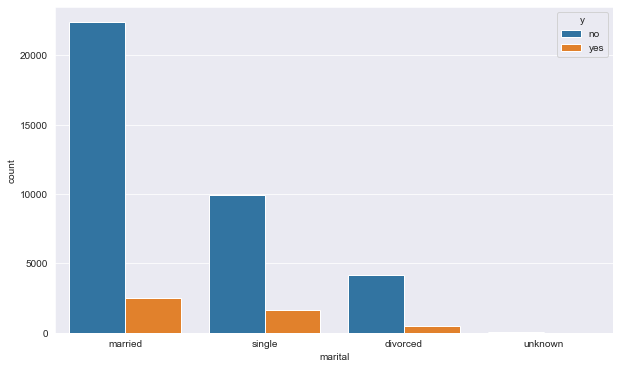

In [465]:
# marital

plt.subplots(1,1,figsize = (10,6))
sns.countplot(x = df.marital, hue = df.y);


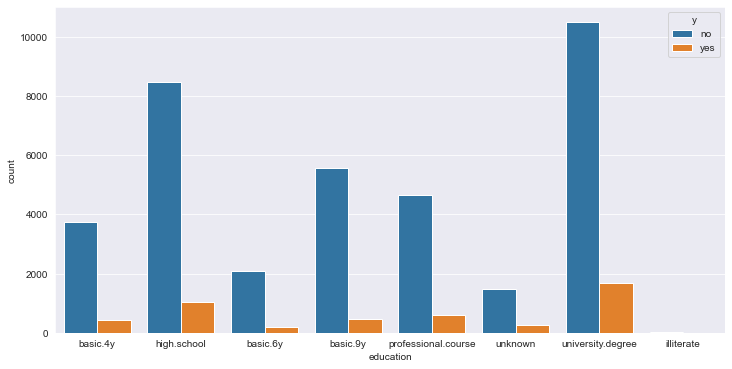

In [466]:
# education

plt.subplots(1,1,figsize = (12,6))
sns.countplot(x = df.education, hue = df.y);


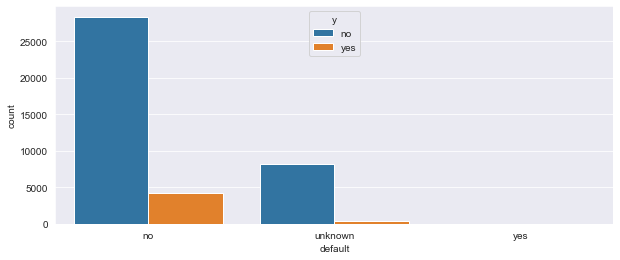

In [467]:
# default

plt.subplots(1,1,figsize = (10,4))
sns.countplot(x = df.default, hue = df.y);


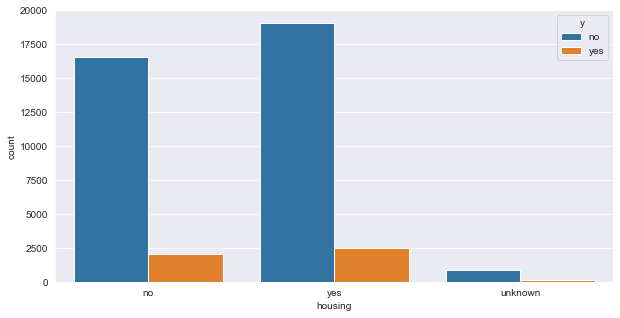

In [468]:
# housing

plt.subplots(1,1,figsize = (10,5))
sns.countplot(x = df.housing, hue = df.y);


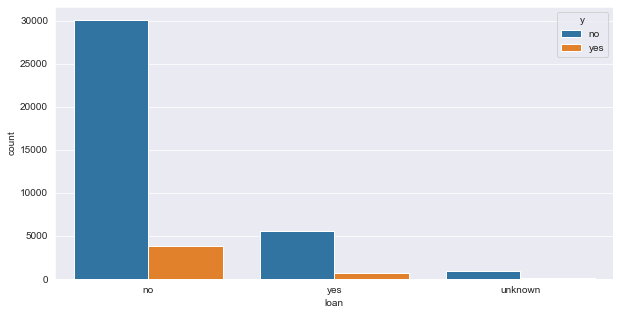

In [469]:
# loan

plt.subplots(1,1,figsize = (10,5))
sns.countplot(x = df.loan, hue = df.y);


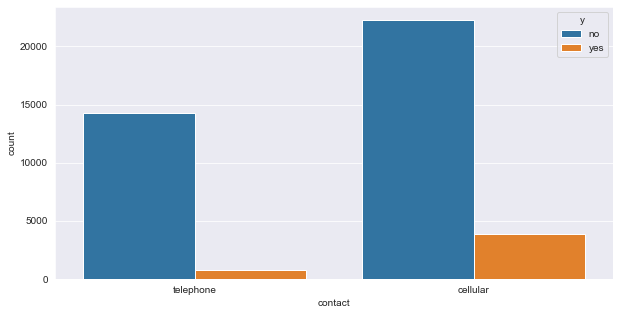

In [470]:
# contact

plt.subplots(1,1,figsize = (10,5))
sns.countplot(x = df.contact, hue = df.y);


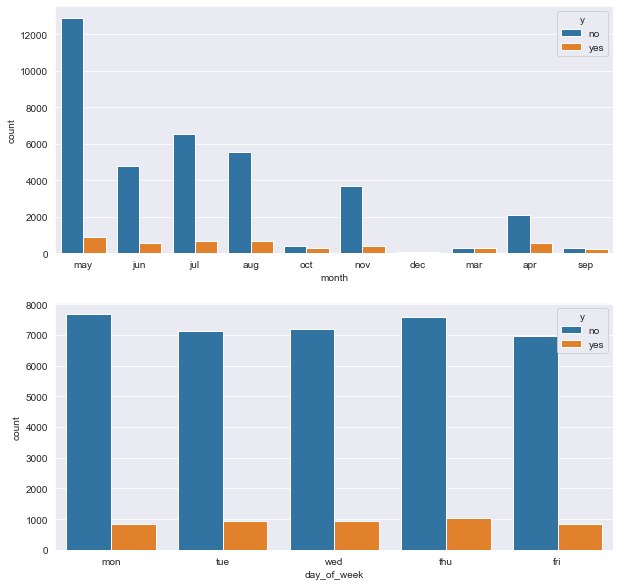

In [471]:
# date

fig,ax = plt.subplots(2,1,figsize = (10,10))
sns.countplot(x = df.month,ax = ax[0], hue = df.y);
sns.countplot(x = df.day_of_week,ax = ax[1], hue = df.y);


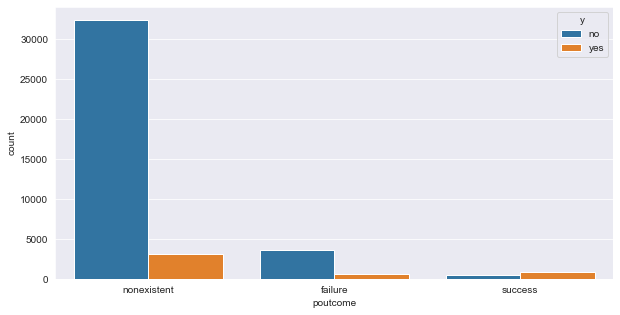

In [472]:
# poutcome (Customers who previously accepted the deposit tends to accept the deposit)

plt.subplots(1,1,figsize = (10,5))
sns.countplot(x = df.poutcome, hue = df.y);


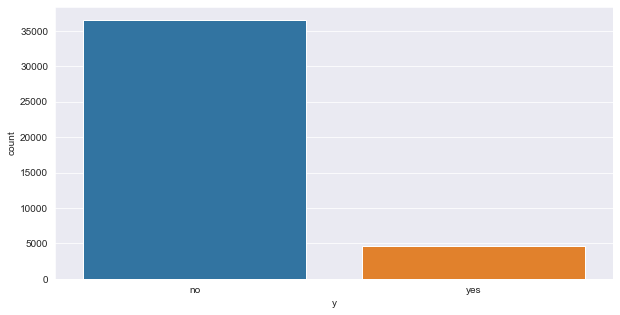

In [473]:
# output y

plt.subplots(1,1,figsize = (10,5))
sns.countplot(x = df.y);

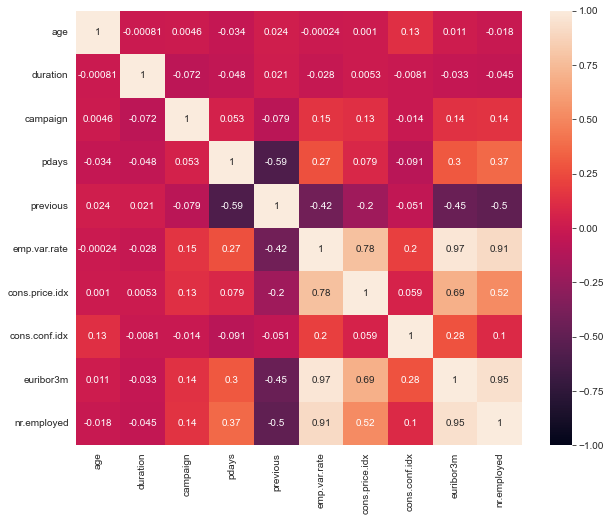

In [474]:
# correlations

corr = df.corr()

plt.subplots(1,1,figsize = (10,8))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1);



# Part 2: Feature Preprocessing


In [475]:
# As the data information said it will be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. 
# Also, duration is obtained after the call is made to the potential client, so if the target client has never received calls this feature is not that useful.

df.drop("duration",axis=1, inplace=True)
df.drop("day_of_week",axis=1, inplace=True)

In [476]:
# Delete unknowns

df=df[df["education"]!="unknown"]
df=df[df["housing"]!="unknown"]
df=df[df["loan"]!="unknown"]
df=df[df["job"]!="unknown"]
df=df[df["marital"]!="unknown"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38234 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38234 non-null  int64  
 1   job             38234 non-null  object 
 2   marital         38234 non-null  object 
 3   education       38234 non-null  object 
 4   default         38234 non-null  object 
 5   housing         38234 non-null  object 
 6   loan            38234 non-null  object 
 7   contact         38234 non-null  object 
 8   month           38234 non-null  object 
 9   campaign        38234 non-null  int64  
 10  pdays           38234 non-null  int64  
 11  previous        38234 non-null  int64  
 12  poutcome        38234 non-null  object 
 13  emp.var.rate    38234 non-null  float64
 14  cons.price.idx  38234 non-null  float64
 15  cons.conf.idx   38234 non-null  float64
 16  euribor3m       38234 non-null  float64
 17  nr.employed     38234 non-null 

In [477]:
df = df[~((df.pdays == 999) & (df.previous != 0))]
df.shape

(34421, 19)

In [478]:
age_z = np.abs(stats.zscore(df.age))
campaign_z = np.abs(stats.zscore(df.campaign))

In [479]:
# Delete outliers

df = df[(age_z <= 3) & (campaign_z <= 3)]

In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33503 entries, 0 to 41186
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             33503 non-null  int64  
 1   job             33503 non-null  object 
 2   marital         33503 non-null  object 
 3   education       33503 non-null  object 
 4   default         33503 non-null  object 
 5   housing         33503 non-null  object 
 6   loan            33503 non-null  object 
 7   contact         33503 non-null  object 
 8   month           33503 non-null  object 
 9   campaign        33503 non-null  int64  
 10  pdays           33503 non-null  int64  
 11  previous        33503 non-null  int64  
 12  poutcome        33503 non-null  object 
 13  emp.var.rate    33503 non-null  float64
 14  cons.price.idx  33503 non-null  float64
 15  cons.conf.idx   33503 non-null  float64
 16  euribor3m       33503 non-null  float64
 17  nr.employed     33503 non-null 

In [481]:

df.default.replace("yes", "other", inplace=True)
df.default.replace("unknown", "other", inplace=True)
df.default.value_counts()

no       26410
other     7093
Name: default, dtype: int64

In [482]:
# Encoding

df = pd.get_dummies(data=df, 
                    columns=["job", "marital", "month", "poutcome"], 
                    prefix=["job", "marital", "month", "poutcome"],
                   drop_first = True)

In [483]:
df['default'] = df['default'].map({"no":0, 'other':1})

df['housing'] = df['housing'].map({"no":0, "yes":1})

df['loan'] = df['loan'].map({"no":0, "yes":1})

df['contact'] = df['contact'].map({"cellular":0, "telephone":1})

df['education'] = df['education'].\
map({'illiterate':0, 'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 'professional.course':5, 'university.degree':6})

df['y'] = df['y'].map({"no":0, "yes":1})




In [484]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33503 entries, 0 to 41186
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   33503 non-null  int64  
 1   education             33503 non-null  int64  
 2   default               33503 non-null  int64  
 3   housing               33503 non-null  int64  
 4   loan                  33503 non-null  int64  
 5   contact               33503 non-null  int64  
 6   campaign              33503 non-null  int64  
 7   pdays                 33503 non-null  int64  
 8   previous              33503 non-null  int64  
 9   emp.var.rate          33503 non-null  float64
 10  cons.price.idx        33503 non-null  float64
 11  cons.conf.idx         33503 non-null  float64
 12  euribor3m             33503 non-null  float64
 13  nr.employed           33503 non-null  float64
 14  y                     33503 non-null  int64  
 15  job_blue-collar    

,age,education,default,housing,loan,contact,campaign,pdays,previous,emp.var.rate,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,56,1,0,0,0,1,1,999,0,1.1,...,0,0,0,0,1,0,0,0,1,0
1,57,4,1,0,0,1,1,999,0,1.1,...,0,0,0,0,1,0,0,0,1,0
2,37,4,0,1,0,1,1,999,0,1.1,...,0,0,0,0,1,0,0,0,1,0
3,40,2,0,0,0,1,1,999,0,1.1,...,0,0,0,0,1,0,0,0,1,0
4,56,4,0,0,1,1,1,999,0,1.1,...,0,0,0,0,1,0,0,0,1,0


# Part 3: Model Training and Result Evaluation


In [485]:
X = df.drop("y", axis = 1)
y = df.y
X.shape


(33503, 37)

In [486]:
# Split X and y into X_train,X_test,y_train,y_test using train_test_split, 
#    stratify using y, using the default test_size (0.2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5293, stratify = y)



In [487]:
#from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import confusion_matrix, accuracy_score
#k_fold = StratifiedKFold(n_splits=10, random_state=5293)



from sklearn.preprocessing import StandardScaler
# scaling data

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Accuracy score 0.901


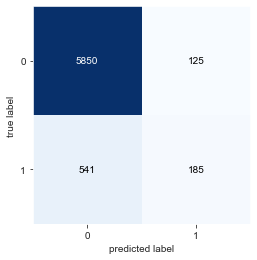

In [488]:
# SVM


from sklearn import metrics
from sklearn.svm import SVC
from mlxtend.plotting import plot_confusion_matrix


# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=5293, kernel='rbf',probability=True)
 
# Fit the model
svc.fit(X_train_std, y_train)



# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))



cm = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm);

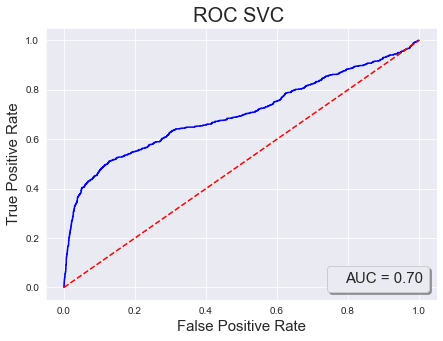

In [489]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, auc, roc_curve

plt.figure(figsize = (7, 5))

probs = svc.predict_proba(X_test_std)
preds = probs[:,1]
fprsvc, tprsvc, _ = roc_curve(y_test, preds)
roc_aucsvc = auc(fprsvc, tprsvc)

plt.plot(fprsvc, tprsvc, 'b', label = 'AUC = %0.2f' % roc_aucsvc);
plt.plot([0, 1], [0, 1],'r--');
plt.title('ROC SVC ',fontsize=20);
plt.ylabel('True Positive Rate',fontsize=15);
plt.xlabel('False Positive Rate',fontsize=15);
plt.legend(loc = 'lower right', fontsize=15, fancybox=True, shadow=True, frameon=True,handlelength=0);